In [78]:
import pandas   as pd
import numpy as np


import seaborn as sns


from sklearn.linear_model import LogisticRegression


from datetime import datetime


from sklearn.metrics import confusion_matrix


from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential

from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf

In [79]:


all_data = pd.read_csv('v02_strong-overlapping2D.txt' , sep = ";" , names = ["1", "2" , "3" ])
all_data

,1,2,3
0,0.782144,-1.390264,1
1,2.011149,0.180109,0
2,-0.751355,-2.202281,1
3,2.034227,-0.333310,0
4,-0.278259,-0.088506,1
...,...,...,...
4995,-0.907344,-0.230688,1
4996,0.202923,0.264392,1
4997,-0.134871,0.049293,1
4998,-0.093209,-0.127762,1


In [80]:
all_count = all_data.shape[0]


In [81]:

print(all_data.describe().loc[["count" , "min" , "max" , "mean"]])

                 1            2       3
count  5000.000000  5000.000000  5000.0
min      -3.291859    -3.639928     0.0
max       3.480585     4.756910     1.0
mean      0.492378     0.522445     0.5


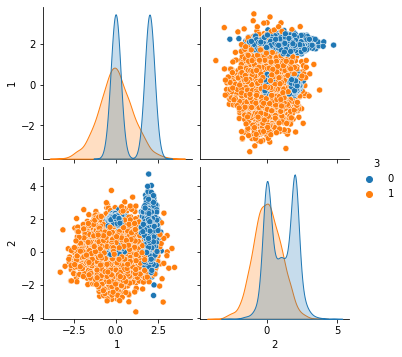

In [82]:


print(sns.pairplot(all_data ,  hue="3"))

In [83]:

train_count = int(np.round(all_count * 0.8))


all_train = all_data.iloc[:train_count]
all_test =  all_data.iloc[train_count:]
all_test

,1,2,3
4000,0.796343,0.438416,1
4001,-0.142553,-0.307782,0
4002,1.736196,0.787537,0
4003,-0.000388,-0.061937,0
4004,1.176587,1.176018,1
...,...,...,...
4995,-0.907344,-0.230688,1
4996,0.202923,0.264392,1
4997,-0.134871,0.049293,1
4998,-0.093209,-0.127762,1


In [84]:
X_train = all_train[["1" , "2"]]
y_train = all_train["3"]
X_test = all_test[["1" , "2"]]
y_test = all_test["3"]


In [85]:
all_train["3"].value_counts()


0    2013
1    1987
Name: 3, dtype: int64

In [86]:

clf = LogisticRegression(random_state=0)

start_time = datetime.now()
clf.fit(X_train, y_train)
end_time = datetime.now()

print("Час навчання:" , end_time - start_time)


Час навчання: 0:00:00.015600


In [87]:


start_time = datetime.now()
clf.score(X_test, y_test)
end_time = datetime.now()

print("Час тестування:" , end_time - start_time)

Час тестування: 0:00:00.015626


In [88]:


print(clf.score(X_test, y_test))

0.752


In [89]:
y_pred = pd.Series(clf.predict(X_test))

print(confusion_matrix(y_test, y_pred))

[[348 139]
 [109 404]]


In [90]:
y_count_categories = len(y_train.unique())
y_count_categories

2

In [99]:

model = Sequential()


model.add(Dense(40, input_shape=(X_train.shape[1],)))


model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))


model.add(tf.keras.layers.Dense(y_count_categories, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 40)                120       
                                                                 
 activation_12 (Activation)  (None, 40)                0         
                                                                 
 dense_18 (Dense)            (None, 50)                2050      
                                                                 
 activation_13 (Activation)  (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 2)                 102       
                                                                 
Total params: 2,272
Trainable params: 2,272
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = datetime.now()

history = model.fit(X_train, y_train,  batch_size=4, epochs=50, verbose=1, validation_split=0.7)
end_time = datetime.now()
print("Час навчання:(keras)" , end_time - start_time)


Epoch 1/50
300/300 [==============================] - 2s 4ms/step - loss: 0.5238 - accuracy: 0.6950 - val_loss: 0.4672 - val_accuracy: 0.7271
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4635 - accuracy: 0.7108 - val_loss: 0.4475 - val_accuracy: 0.7557
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.7625 - val_loss: 0.4182 - val_accuracy: 0.7950
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8067 - val_loss: 0.3976 - val_accuracy: 0.8411
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8375 - val_loss: 0.3837 - val_accuracy: 0.8607
Epoch 6/50
300/300 [==============================] - 1s 5ms/step - loss: 0.3733 - accuracy: 0.8475 - val_loss: 0.3744 - val_accuracy: 0.8600
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8517 - val_loss: 0.3513 - val_accuracy: 0.8750
Epoch 

In [101]:
start_time = datetime.now()
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
end_time = datetime.now()
print("Час тестування:(keras)" , end_time - start_time)

print('\nТочність на тесті:', test_acc)



32/32 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8660
Час тестування:(keras) 0:00:00.271391

Точність на тесті: 0.8659999966621399


In [102]:
y_pred_keras = model.predict(X_test)
y_pred_keras_needed_col= np.round(y_pred_keras[: , 1])

32/32 [==============================] - 0s 2ms/step


In [103]:
# матриця помилок


print(confusion_matrix(y_test, y_pred_keras_needed_col))

[[414  73]
 [ 61 452]]
